# Lab 1.2 - Manipulating Abstractions via Open-Source Python
### Luke Zaruba
### GIS 5572: ArcGIS II
### 2023-02-16

In [1]:
import fiona
import geopandas as gpd
import shapely

## Fiona

In the following code blocks, Fiona and Shapely will be used to perform common geospatial manipulation tasks, ranging from high-level tasks to constructing files from GIS primitives. They act as open-source alternatives to ArcPy.

Fiona is a Python library that acts as a "neat and nimble API" for vector OGR operations in Python. Furthermore, primitives can be constructed using Shapely, a Python wrapper for GEOS, a popular geometry library, that is also responsible for powering geometries in PostGIS. In most of the examples here, primitives are actually constructed from native Python data types, rather than Shapely objects.

For more information on [Fiona](https://fiona.readthedocs.io/en/latest/README.html) and [Shapely](https://shapely.readthedocs.io/en/stable/index.html), check out their documentation.

### 1. Create an Empty Feature Class (Shapefile)

In this example, an empty shapefile is being created from scratch using Fiona.

In [2]:
# Defining a Schema
emptySchema = {'geometry':'Point', 'properties':[('Name', 'str')]}

# Open Shapefile Object
myEmptyShp = fiona.open('../Outputs/empty.shp', mode='w', driver='ESRI Shapefile', schema=emptySchema, crs="EPSG:4326")

# Close Shapefile Object
myEmptyShp.close()

### 2. Create a Feature Class (Shapefile) with Points

In this example, a shapefile is being created from scratch using Fiona and points are being added into it.

In [3]:
# Input Data
myCities = {'Minneapolis':[-93.2650, 44.9778], 'Duluth':[-92.1005, 46.7867], 'Rochester':[-92.4802, 44.0121]}

# Defining a Schema
ptSchema = {'geometry':'Point', 'properties':[('Name', 'str')]}

# Open Shapefile Object
myPointShp = fiona.open('../Outputs/myCities.shp', mode='w', driver='ESRI Shapefile', schema=ptSchema, crs="EPSG:4326")

# Write Key-Value Pairs from myCities dict into myShp Shapefile
for city in myCities:
    rowDict = {
        'geometry' : {'type' : 'Point',
                    'coordinates' : (myCities[city][0], myCities[city][1])}, 
        'properties' : {'Name':city},
    }

    myPointShp.write(rowDict)

# Close Out of Shapefile
myPointShp.close()

### 3. Create a Feature Class (Shapefile) with Lines 
In this example, a shapefile is being created from scratch using Fiona and a single line feature is being added into it.

In [4]:
# Input Data
myCityLines = [(-93.2650, 44.9778), (-92.1005, 46.7867), (-92.4802, 44.0121)]

# Defining a Schema
lineSchema = {'geometry':'LineString', 'properties':[('Name', 'str')]}

# Open Shapefile Object
myLineShp = fiona.open('../Outputs/myLine.shp', mode='w', driver='ESRI Shapefile', schema=lineSchema, crs="EPSG:4326")

# Write Coordinates from myCityLines list into myShp Shapefile
rowDict = {
        'geometry' : {'type' : 'LineString',
                    'coordinates' : myCityLines}, 
        'properties' : {'Name' : 'Feature1'},
    }

myLineShp.write(rowDict)

# Close Out of Shapefile
myLineShp.close()

### 4. Create a Feature Class (Shapefile) with Polygons 
In this example, a shapefile is being created from scratch using Fiona and a single polygon feature is being added into it.

*Note:* Notice how although there are many similarities here with creating lines, there are a few differences

In [5]:
# Input Data
myCityPolygon = [(-93.2650, 44.9778), (-92.1005, 46.7867), (-92.4802, 44.0121)]

# Defining a Schema
polygonSchema = {'geometry':'Polygon', 'properties':[('Name', 'str')]}

# Open Shapefile Object
myPolygonShp = fiona.open('../Outputs/myPolygon.shp', mode='w', driver='ESRI Shapefile', schema=polygonSchema, crs="EPSG:4326")

# Write Coordinates from myCityLines list into myShp Shapefile
rowDict = {
        'geometry' : {'type' : 'Polygon',
                    'coordinates' : [myCityPolygon]}, 
        'properties' : {'Name' : 'Feature1'},
    }

myPolygonShp.write(rowDict)

# Close Out of Shapefile
myPolygonShp.close()

### 5. View Each Row in an Attribute Table for a Feature Class (Shapefile)
In this example, we will use the point Shapefile created in step 2 and load it into a GeoDataFrame to examine it in a table.

In [6]:
# Load Shapefile into GDF
myCitiesGDF = gpd.read_file('../Outputs/myCities.shp')

# View GDF
myCitiesGDF

,Name,geometry
0,Minneapolis,POINT (-93.26500 44.97780)
1,Duluth,POINT (-92.10050 46.78670)
2,Rochester,POINT (-92.48020 44.01210)


### 6. View Each Geometry Object for a Feature Class (Shapefile)
In this example, we will use the GeoDataFrame that we created in the previous step and view each feature.

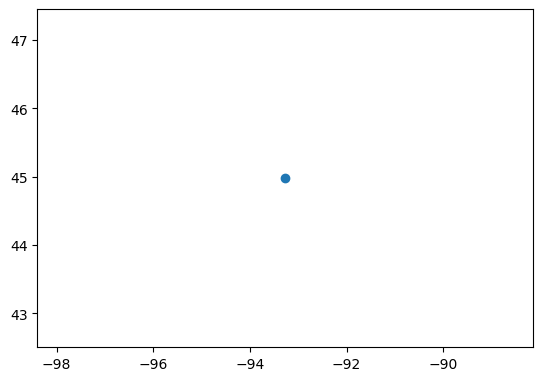

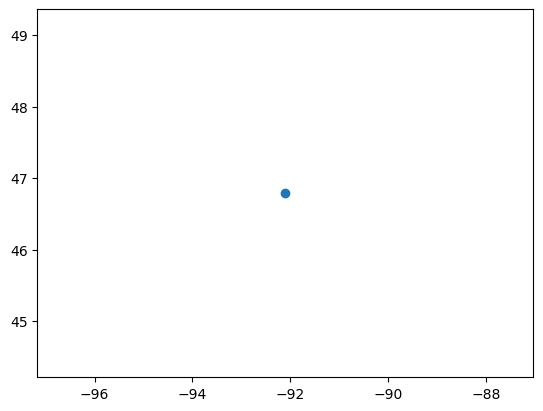

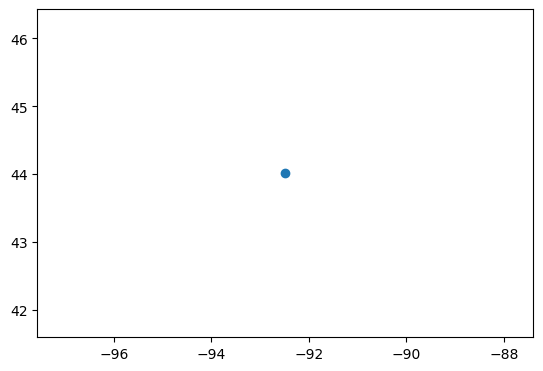

In [7]:
# Loop through GDF and Plot each Feature
for i in range(len(myCitiesGDF)):
    myCitiesGDF.loc[[i], 'geometry'].plot()

### 7. Summarize the Contents of a Feature Class (Shapefile)
In this example, we will use the GeoDataFrame that we used in the previous step and summarize its contents.

In [8]:
# Summarize GDF Contents
myCitiesGDF.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      3 non-null      object  
 1   geometry  3 non-null      geometry
dtypes: geometry(1), object(1)
memory usage: 176.0+ bytes


### 8. Export to Shapefile
Because we already know how to create a Shapefile from scratch using Fiona, we will start with a GeoDataFrame and export it to a Shapefile in this example.

In [9]:
# Export to Shapefile
myCitiesGDF.to_file('../Outputs/myGDF.shp')

/Users/lukezaruba/opt/anaconda3/envs/geo/lib/python3.9/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


### 9. Export to Geodatabase
Similarly to Shapefiles, Geodatabases are a file format created by Esri, except they are not as easy to access and manipulate with open-source tools as Shapefiles are.

By looking at Fiona's supported drivers (as seen in the code block below) we can see a driver called *OpenFileGDB* with a value of *r*. This means that with Fiona, we can actually read in File Geodatabases, but we can not append or write to them, as we can with Shapefiles (seen in the driver called *ESRI Shapefile* with values *raw* for read, append, and write, respectively).

In [10]:
fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'rw',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SQLite': 'raw',
 'SUA': 'r',
 'TopoJSON': 'r'}

### Let's Check Out the Results!

The following code blocks use Shell Script, as VSCode refers to it (which in my case is Zsh), to check if the outputs are actually there and then deletes them so that we can use other methods to recreate the same files.

In [11]:
pwd

'/Users/lukezaruba/Documents/Spring 2023/GIS 5572/GitHub/GIS5572/Lab1/Notebooks'

In [12]:
cd ../Outputs

/Users/lukezaruba/Documents/Spring 2023/GIS 5572/GitHub/GIS5572/Lab1/Outputs


In [13]:
ls

empty.cpg      myCities.cpg   myGDF.cpg      myLine.cpg     myPolygon.cpg
empty.dbf      myCities.dbf   myGDF.dbf      myLine.dbf     myPolygon.dbf
empty.prj      myCities.prj   myGDF.prj      myLine.prj     myPolygon.prj
empty.shp      myCities.shp   myGDF.shp      myLine.shp     myPolygon.shp
empty.shx      myCities.shx   myGDF.shx      myLine.shx     myPolygon.shx


All the shapefiles are in the folder, so it looks like everything worked good!

Now we can delete the files, so that we can run other notebooks to create the data using various other methods.

In [14]:
rm *

In [15]:
ls

All the shapefiles have been deleted. Time to test out some other methods!